# Imports

In [2]:
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import nn
import numpy as np
from functools import partial
import matplotlib.pyplot as plt 
import time
from IPython.display import Image

In [3]:
from api.gaussian_functions import (gaussian_data_sampling_mu, 
                                 gaussian_data_sampling_nu,
                                 nu_sampler_from_discrete_distr)

from api.constants import (f_net_default, u_net_default, v_vec_default,
                           centers_nu_default, cov_matrix_default,
                           c_cost_type_default, d_cost_type_default,
                           reg_modes_arr, batch_size_val_default,
                           reg_mode_default, eps_default,
                           epochs_default, batch_size_default, 
                           dtype_default, device_default,
                           random_state_default, random_states_train_default,
                           mu_sampler_default, nu_data_val_default, 
                           optimizer_mode_default, lr_default, 
                           centers_nu_default,
                           dir_to_save_default)

from api.gaussian_functions import index_sampler

from api.neural_ot import Neural_OT
from api.neural_ot_continious_to_discrete import Neural_OT_continious_to_discrete

# Parameters

In [4]:
torch.manual_seed(42)

my_u_net = nn.Sequential(
                  nn.Linear(2, 200),
                  nn.ReLU(),
                  nn.Dropout(p = 0.5),
                  nn.Linear(200, 500),
                  nn.ReLU(),
                  nn.Dropout(p = 0.5),
                  nn.Linear(500, 500),
                  nn.ReLU(),
                  nn.Dropout(p = 0.5),
                  nn.Linear(500, 1)
                 )

my_f_net = nn.Sequential(
                  nn.Linear(2, 200),
                  nn.ReLU(),
                  nn.Dropout(p = 0.5),
                  nn.Linear(200, 500),
                  nn.ReLU(),
                  nn.Dropout(p = 0.5),
                  nn.Linear(500, 500),
                  nn.ReLU(),
                  nn.Dropout(p = 0.5),
                  nn.Linear(500, 2)
                 )

batch_size_val = 1000
nu_data = gaussian_data_sampling_nu(centers_nu_default, 
                                                     cov_matrix_default, 
                                                     batch_size_val, 
                                                     random_state_default, 
                                                     device = device_default)

my_v_vec = torch.zeros(batch_size_val, 
                                   dtype = dtype_default)

my_eps = 1e-2
my_reg_mode = 'l2'

# Testing

In [5]:
default_experiment = Neural_OT_continious_to_discrete(eps = my_eps, reg_mode = my_reg_mode)

In [6]:
default_experiment.replace_u(my_u_net)
default_experiment.replace_v(my_v_vec)

dual_loss_arr_batch = []
dual_loss_arr_val = []

lr = 1e-3
optimizer_mode = 'Adam'

epochs = 200
epoch_step_to_print = 20

random_states_train = range(epochs)

batch_size = 1000

default_experiment.stochastic_OT_computation(lr = lr, epochs = epochs,
                                             batch_size = batch_size,
                                             optimizer_mode = optimizer_mode,
                                             random_states_train = random_states_train,
                                             mu_sampler = mu_sampler_default, 
                                             index_sampler = index_sampler,
                                             nu_data = nu_data,
                                             loss_arr_batch = dual_loss_arr_batch,
                                             loss_arr_val = dual_loss_arr_val, 
                                             epoch_step_to_print = epoch_step_to_print)

------------------------------
Epoch_num = 1
Consumed time = 0.143110990524292 seconds
Loss estimation on sampled data = -0.007158218375960847
Loss estimation on validation data = 0.3058992306317448
------------------------------
Epoch_num = 21
Consumed time = 0.001825094223022461 seconds
Loss estimation on sampled data = 2.5050862668095415
Loss estimation on validation data = 2.728501915879074
------------------------------
Epoch_num = 41
Consumed time = 0.0017521381378173828 seconds
Loss estimation on sampled data = 2.753893443121292
Loss estimation on validation data = 2.7672981492304256
------------------------------
Epoch_num = 61
Consumed time = 0.0018002986907958984 seconds
Loss estimation on sampled data = 2.75126676723517
Loss estimation on validation data = 2.8009916875025103
------------------------------
Epoch_num = 81
Consumed time = 0.0024983882904052734 seconds
Loss estimation on sampled data = 2.734464036020009
Loss estimation on validation data = 2.8342313805083905
---

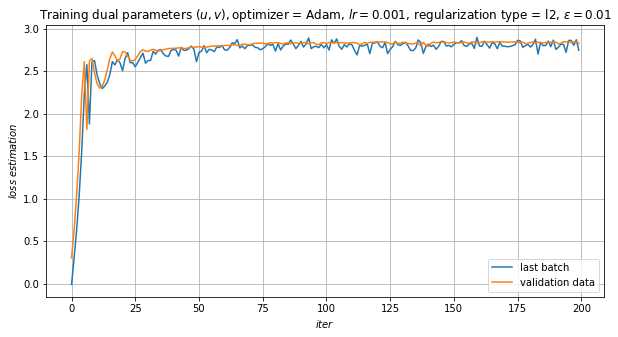

In [7]:
plot_mode = 'dual'

default_experiment.plot_loss_graphs(loss_arr_batch = dual_loss_arr_batch, 
                                    loss_arr_val = dual_loss_arr_val, 
                                    optimizer_mode = optimizer_mode, 
                                    plot_mode = plot_mode,
                                    lr = lr)

In [8]:
default_experiment.replace_f(my_f_net)

loss_arr_batch = []
loss_arr_val = []

lr = 1e-3
optimizer_mode = 'Adam'

epochs = 201
epoch_step_to_print = 10
random_states_train = range(epochs)
random_state_val = random_state_default

batch_size = 1000

default_experiment.optimal_map_learning(lr = lr, epochs = epochs,
                                             batch_size = batch_size,
                                             optimizer_mode = optimizer_mode,
                                             mu_sampler = mu_sampler_default, 
                                             index_sampler = index_sampler,
                                             nu_data = nu_data,
                                             random_states_train = random_states_train,
                                             random_state_val = random_state_val,
                                             loss_arr_batch = loss_arr_batch,
                                             loss_arr_val = loss_arr_val,
                                             epoch_step_to_print = epoch_step_to_print,
                                             make_gif = True)

------------------------------
Epoch_num = 1
Consumed time = 0.003859281539916992 seconds
Loss estimation on sampled data = 2.1775547722170177
Loss estimation on validation data = 2.1481992529517377
------------------------------
Epoch_num = 11
Consumed time = 0.0023775100708007812 seconds
Loss estimation on sampled data = 1.843444499561461
Loss estimation on validation data = 1.7944290806175125
------------------------------
Epoch_num = 21
Consumed time = 0.0024013519287109375 seconds
Loss estimation on sampled data = 2.0039588479771115
Loss estimation on validation data = 1.755091399595219
------------------------------
Epoch_num = 31
Consumed time = 0.0026023387908935547 seconds
Loss estimation on sampled data = 1.5108934952827187
Loss estimation on validation data = 0.99735648688431
------------------------------
Epoch_num = 41
Consumed time = 0.0023751258850097656 seconds
Loss estimation on sampled data = 1.0306233060920205
Loss estimation on validation data = 0.8859606453475075
-

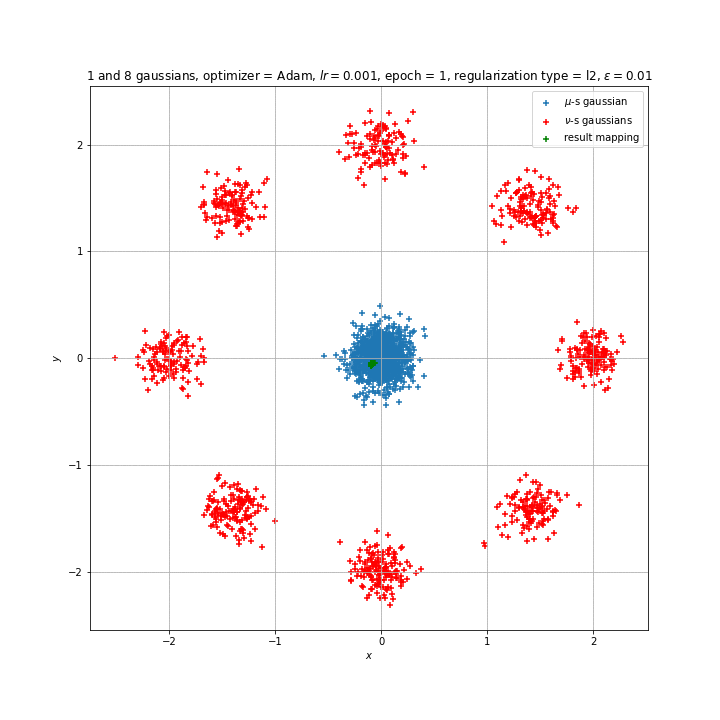

In [9]:
gif = default_experiment.create_path_to_gif(optimizer_mode, lr)
Image(gif)

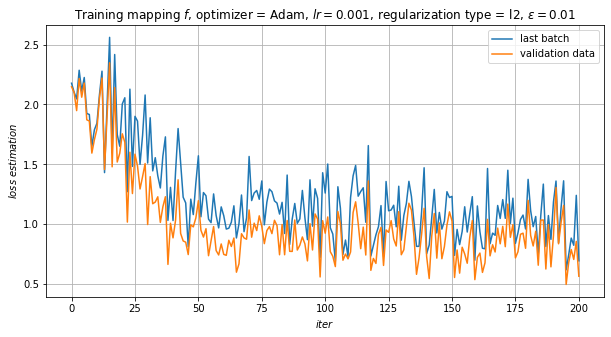

In [10]:
plot_mode = 'mapping training'

default_experiment.plot_loss_graphs(loss_arr_batch = loss_arr_batch, 
                                    loss_arr_val = loss_arr_val, 
                                    optimizer_mode = optimizer_mode, 
                                    plot_mode = plot_mode,
                                    lr = lr)

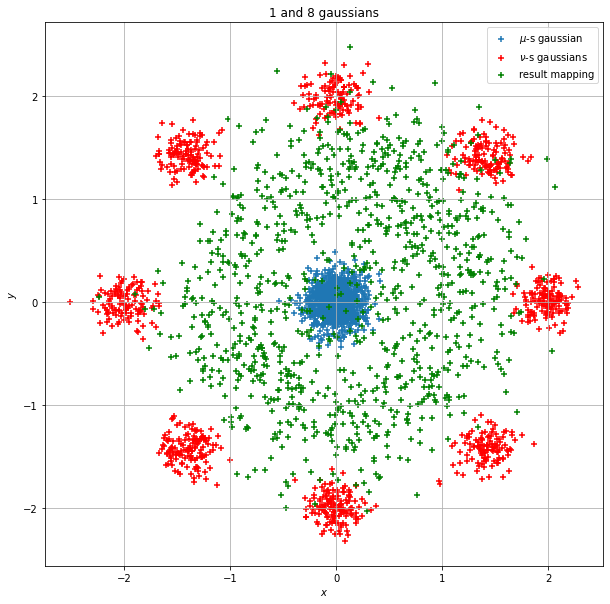

In [11]:
random_state = random_state_default

default_experiment.plot_2d_mapping_discrete_nu(mu_sampler = mu_sampler_default, 
                                               nu_data_val = nu_data,
                                               random_state = random_state,
                                               show_plot = True)

In [12]:
default_experiment.replace_f(my_f_net)

algo_2_loss_arr_batch = []
algo_2_loss_arr_val = []

lr = 1e-2
optimizer_mode = 'Algo 2'

epochs = 500
epoch_step_to_print = 50

shift = 1000
random_states_train = range(shift, shift + epochs)
random_state_val = random_state_default

batch_size = 1000

default_experiment.optimal_map_learning_algo_2(lr = lr, epochs = epochs,
                                             batch_size = batch_size,
                                             mu_sampler = mu_sampler_default, 
                                             index_sampler = index_sampler,
                                             nu_data = nu_data,
                                             random_states_train = random_states_train,
                                             random_state_val = random_state_val,
                                             loss_arr_batch = algo_2_loss_arr_batch,
                                             loss_arr_val = algo_2_loss_arr_val,
                                             epoch_step_to_print = epoch_step_to_print)

------------------------------
Epoch_num = 1
Consumed time = 0.002279043197631836 seconds
Loss estimation on sampled data = 2.145390192389893
Loss estimation on validation data = 1.9095012331735655
------------------------------
Epoch_num = 51
Consumed time = 0.0018398761749267578 seconds
Loss estimation on sampled data = 1.9603175237854422
Loss estimation on validation data = 1.839765701636845
------------------------------
Epoch_num = 101
Consumed time = 0.0018503665924072266 seconds
Loss estimation on sampled data = 1.704430865760659
Loss estimation on validation data = 1.6540139427078324
------------------------------
Epoch_num = 151
Consumed time = 0.0024483203887939453 seconds
Loss estimation on sampled data = 1.4009791211819185
Loss estimation on validation data = 1.4105657117307082
------------------------------
Epoch_num = 201
Consumed time = 0.0019979476928710938 seconds
Loss estimation on sampled data = 0.8588442969992273
Loss estimation on validation data = 1.03047333574773

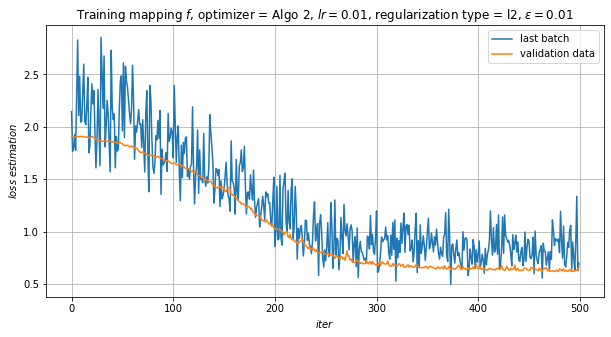

In [13]:
plot_mode = 'mapping training'

default_experiment.plot_loss_graphs(loss_arr_batch = algo_2_loss_arr_batch, 
                                    loss_arr_val = algo_2_loss_arr_val, 
                                    optimizer_mode = optimizer_mode, 
                                    plot_mode = plot_mode,
                                    lr = lr)

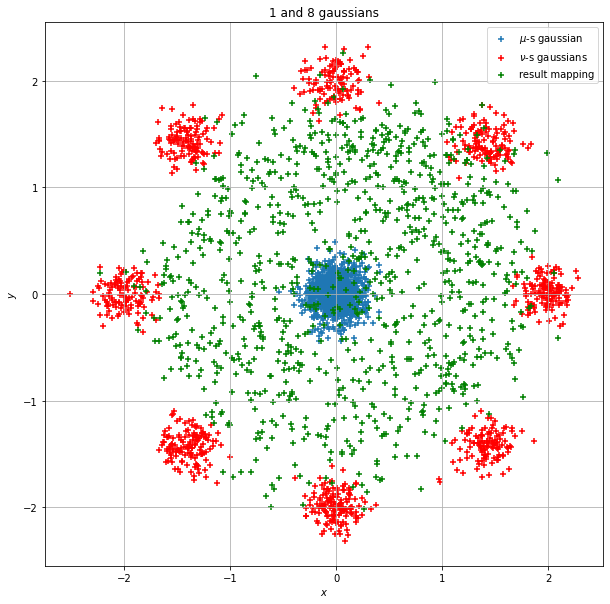

In [14]:
default_experiment.plot_2d_mapping_discrete_nu(mu_sampler = mu_sampler_default, 
                                               nu_data_val = nu_data,
                                               random_state = random_state,
                                               show_plot = True)